In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import time
import datetime
from datetime import timedelta
import scipy.stats as stats
from scipy.stats import pointbiserialr

In [2]:
ID_70_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_070_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_14_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_014_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_13_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_013_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [13]:
ID_70_2020

,CreateDateTime,TagValue,TagId
0,2020-02-06 13:05:56.982,0.000000,70
1,2020-02-06 13:11:43.551,0.491333,70
2,2020-02-06 13:11:43.754,3.713989,70
3,2020-02-06 13:11:43.957,7.690430,70
4,2020-02-06 13:11:44.159,11.755370,70
...,...,...,...
517667,2020-12-26 22:28:18.740,4.205322,70
517668,2020-12-26 22:28:18.949,0.729370,70
517669,2020-12-26 22:28:19.152,0.091553,70
517670,2020-12-26 22:28:19.358,0.012207,70


<AxesSubplot:xlabel='CreateDateTime'>

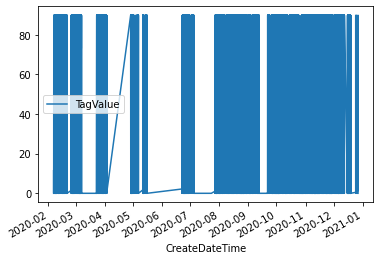

In [3]:
ID_70_2020.plot('CreateDateTime','TagValue')

In [14]:
ID_14_2020

,CreateDateTime,TagValue,TagId
0,2020-02-06 13:05:56.982,0.0,14
1,2020-02-06 13:17:51.419,1.0,14
2,2020-02-06 13:17:59.371,0.0,14
3,2020-02-06 13:36:43.395,1.0,14
4,2020-02-06 13:36:57.488,0.0,14
...,...,...,...
20118,2020-12-18 23:15:37.505,0.0,14
20119,2020-12-18 23:36:43.470,1.0,14
20120,2020-12-18 23:37:03.551,0.0,14
20121,2020-12-18 23:58:55.525,1.0,14


<AxesSubplot:xlabel='CreateDateTime'>

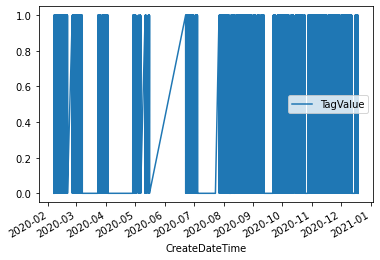

In [4]:
ID_14_2020.plot('CreateDateTime','TagValue')

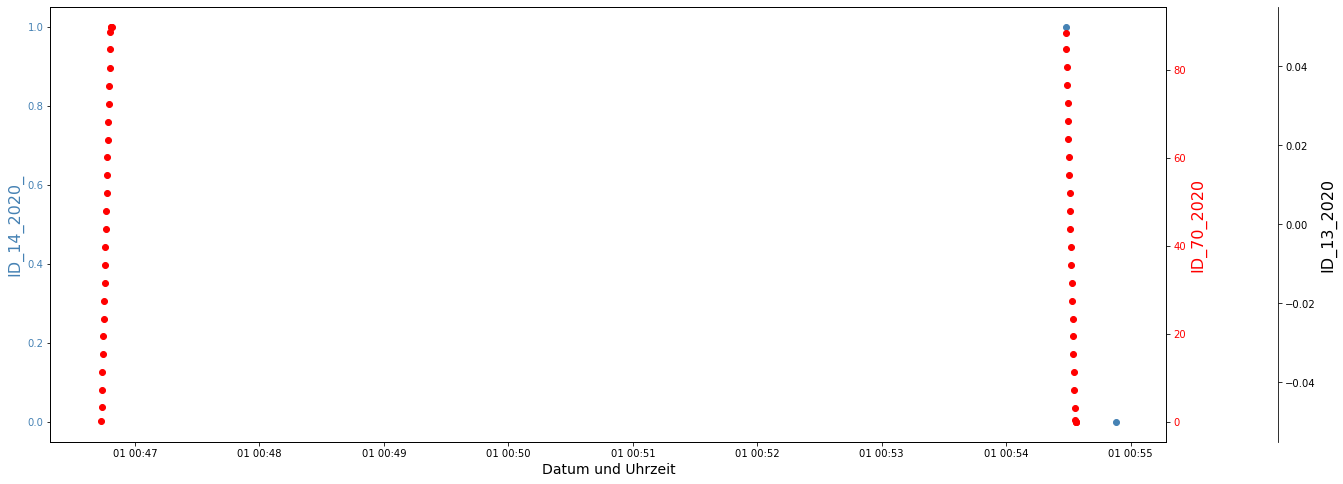

In [33]:
Daten_1=ID_14_2020
Daten_2=ID_70_2020
Daten_3=ID_13_2020


Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-03-01 00:40:00')&(Daten_1['CreateDateTime']<'2020-03-01 00:56:00')]
Daten_2=Daten_2[(Daten_2['CreateDateTime']>'2020-03-01 00:40:00')&(Daten_2['CreateDateTime']<'2020-03-01 00:56:00')]
Daten_3=Daten_3[(Daten_3['CreateDateTime']>'2020-03-01 00:40:00')&(Daten_3['CreateDateTime']<'2020-03-01 00:56:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('ID_14_2020_', color=col1, fontsize=16)
ax.scatter(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
#plt.ylim((0, 100))


#define second y-axis that shares x-axis with current plot


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('ID_70_2020', color=col2, fontsize=16)
ax2.scatter(Daten_2.CreateDateTime, Daten_2.TagValue, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
#plt.ylim((-1,10))


ax3 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax3.set_ylabel('ID_13_2020', color=col3, fontsize=16)
ax3.plot(Daten_3.CreateDateTime, Daten_3.TagValue, color=col3)
ax3.tick_params(axis='y', labelcolor=col3)
ax3.spines["right"].set_position(("axes", 1.1))

In [3]:
ID_14_70_2020 = ID_14_2020.set_index('CreateDateTime').join(ID_70_2020.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
ID_14_70_2020

,TagValue_l,TagId_l,TagValue_r,TagId_r
CreateDateTime,,,,
2020-02-06 13:05:56.982,0.0,14.0,0.000000,70.0
2020-02-06 13:11:43.551,NaN,NaN,0.491333,70.0
2020-02-06 13:11:43.754,NaN,NaN,3.713989,70.0
2020-02-06 13:11:43.957,NaN,NaN,7.690430,70.0
2020-02-06 13:11:44.159,NaN,NaN,11.755370,70.0
...,...,...,...,...
2020-12-26 22:28:18.740,NaN,NaN,4.205322,70.0
2020-12-26 22:28:18.949,NaN,NaN,0.729370,70.0
2020-12-26 22:28:19.152,NaN,NaN,0.091553,70.0


Pandas computed Pearson r: -0.14622288946658132
Scipy computed Pearson r: -0.14622288946656709 and p-value: 0.0


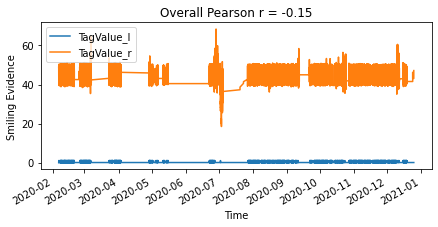

In [12]:
#不进行数据处理直接算相关性结果极差
df = ID_14_70_2018 
overall_pearson_r = df.corr().iloc[0,2]
print(f"Pandas computed Pearson r: {overall_pearson_r}")


r, p = stats.pearsonr(df.dropna()['TagValue_l'], df.dropna()['TagValue_r'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


df2=df[['TagValue_l','TagValue_r']]
f,ax=plt.subplots(figsize=(7,3))
df2.rolling(window=150,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Smiling Evidence')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}")
plt.show()

In [4]:
ID_14_70_2020['shift_1']=ID_14_70_2020.TagValue_r.shift(periods=1)
ID_14_70_2020['shift_-1']=ID_14_70_2020.TagValue_r.shift(periods=-1)
ID_14_70_2020

,TagValue_l,TagId_l,TagValue_r,TagId_r,shift_1,shift_-1
CreateDateTime,,,,,,
2020-02-06 13:05:56.982,0.0,14.0,0.000000,70.0,NaN,0.491333
2020-02-06 13:11:43.551,NaN,NaN,0.491333,70.0,0.000000,3.713989
2020-02-06 13:11:43.754,NaN,NaN,3.713989,70.0,0.491333,7.690430
2020-02-06 13:11:43.957,NaN,NaN,7.690430,70.0,3.713989,11.755370
2020-02-06 13:11:44.159,NaN,NaN,11.755370,70.0,7.690430,15.832520
...,...,...,...,...,...,...
2020-12-26 22:28:18.740,NaN,NaN,4.205322,70.0,8.203125,0.729370
2020-12-26 22:28:18.949,NaN,NaN,0.729370,70.0,4.205322,0.091553
2020-12-26 22:28:19.152,NaN,NaN,0.091553,70.0,0.729370,0.012207


In [5]:
ID_14_70_2020.reset_index().loc[22215:22260,:]

,CreateDateTime,TagValue_l,TagId_l,TagValue_r,TagId_r,shift_1,shift_-1
22215,2020-02-14 02:50:20.757,NaN,NaN,15.884400,70.0,19.964600,11.804200
22216,2020-02-14 02:50:20.962,NaN,NaN,11.804200,70.0,15.884400,7.723999
22217,2020-02-14 02:50:21.165,NaN,NaN,7.723999,70.0,11.804200,3.643799
22218,2020-02-14 02:50:21.368,NaN,NaN,3.643799,70.0,7.723999,0.595093
22219,2020-02-14 02:50:21.570,NaN,NaN,0.595093,70.0,3.643799,0.079346
22220,2020-02-14 02:50:21.772,NaN,NaN,0.079346,70.0,0.595093,0.009155
22221,2020-02-14 02:50:21.974,NaN,NaN,0.009155,70.0,0.079346,0.000000
22222,2020-02-14 02:50:22.175,NaN,NaN,0.000000,70.0,0.009155,NaN
22223,2020-02-14 02:50:29.069,0.0,14.0,NaN,NaN,0.000000,0.833130
22224,2020-02-14 03:03:18.521,NaN,NaN,0.833130,70.0,NaN,4.321289


In [6]:
print(datetime.datetime.now())
df=ID_14_70_2020
for indexs in df.index:
        if df.loc[indexs, "TagValue_l"] == 0:
            df.loc[indexs, "TagValue_r"]=df.loc[indexs, "shift_1"]
for indexs in df.index:
        if df.loc[indexs, "TagValue_l"] == 1:
            df.loc[indexs, "TagValue_r"]=df.loc[indexs, "shift_-1"]
print(datetime.datetime.now())

2022-09-15 23:12:25.230545
2022-09-15 23:13:03.252356


In [7]:
df

,TagValue_l,TagId_l,TagValue_r,TagId_r,shift_1,shift_-1
CreateDateTime,,,,,,
2020-02-06 13:05:56.982,0.0,14.0,NaN,70.0,NaN,0.491333
2020-02-06 13:11:43.551,NaN,NaN,0.491333,70.0,0.000000,3.713989
2020-02-06 13:11:43.754,NaN,NaN,3.713989,70.0,0.491333,7.690430
2020-02-06 13:11:43.957,NaN,NaN,7.690430,70.0,3.713989,11.755370
2020-02-06 13:11:44.159,NaN,NaN,11.755370,70.0,7.690430,15.832520
...,...,...,...,...,...,...
2020-12-26 22:28:18.740,NaN,NaN,4.205322,70.0,8.203125,0.729370
2020-12-26 22:28:18.949,NaN,NaN,0.729370,70.0,4.205322,0.091553
2020-12-26 22:28:19.152,NaN,NaN,0.091553,70.0,0.729370,0.012207


In [48]:
a = df
a.reset_index().loc[22215:22260,:]

,CreateDateTime,TagValue_l,TagId_l,TagValue_r,TagId_r,shift_1,shift_-1
22215,2020-02-14 02:50:20.757,NaN,NaN,15.884400,70.0,19.964600,11.804200
22216,2020-02-14 02:50:20.962,NaN,NaN,11.804200,70.0,15.884400,7.723999
22217,2020-02-14 02:50:21.165,NaN,NaN,7.723999,70.0,11.804200,3.643799
22218,2020-02-14 02:50:21.368,NaN,NaN,3.643799,70.0,7.723999,0.595093
22219,2020-02-14 02:50:21.570,NaN,NaN,0.595093,70.0,3.643799,0.079346
22220,2020-02-14 02:50:21.772,NaN,NaN,0.079346,70.0,0.595093,0.009155
22221,2020-02-14 02:50:21.974,NaN,NaN,0.009155,70.0,0.079346,0.000000
22222,2020-02-14 02:50:22.175,NaN,NaN,0.000000,70.0,0.009155,NaN
22223,2020-02-14 02:50:29.069,0.0,14.0,0.000000,NaN,0.000000,0.833130
22224,2020-02-14 03:03:18.521,NaN,NaN,0.833130,70.0,NaN,4.321289


In [8]:
df["TagId_l"]=df["TagId_l"].fillna(method="ffill")
df["TagId_r"]=df["TagId_r"].fillna(method="ffill")
df

,TagValue_l,TagId_l,TagValue_r,TagId_r,shift_1,shift_-1
CreateDateTime,,,,,,
2020-02-06 13:05:56.982,0.0,14.0,NaN,70.0,NaN,0.491333
2020-02-06 13:11:43.551,NaN,14.0,0.491333,70.0,0.000000,3.713989
2020-02-06 13:11:43.754,NaN,14.0,3.713989,70.0,0.491333,7.690430
2020-02-06 13:11:43.957,NaN,14.0,7.690430,70.0,3.713989,11.755370
2020-02-06 13:11:44.159,NaN,14.0,11.755370,70.0,7.690430,15.832520
...,...,...,...,...,...,...
2020-12-26 22:28:18.740,NaN,14.0,4.205322,70.0,8.203125,0.729370
2020-12-26 22:28:18.949,NaN,14.0,0.729370,70.0,4.205322,0.091553
2020-12-26 22:28:19.152,NaN,14.0,0.091553,70.0,0.729370,0.012207


In [9]:
df = df.drop(['shift_1','shift_-1'], axis=1)
df

,TagValue_l,TagId_l,TagValue_r,TagId_r
CreateDateTime,,,,
2020-02-06 13:05:56.982,0.0,14.0,NaN,70.0
2020-02-06 13:11:43.551,NaN,14.0,0.491333,70.0
2020-02-06 13:11:43.754,NaN,14.0,3.713989,70.0
2020-02-06 13:11:43.957,NaN,14.0,7.690430,70.0
2020-02-06 13:11:44.159,NaN,14.0,11.755370,70.0
...,...,...,...,...
2020-12-26 22:28:18.740,NaN,14.0,4.205322,70.0
2020-12-26 22:28:18.949,NaN,14.0,0.729370,70.0
2020-12-26 22:28:19.152,NaN,14.0,0.091553,70.0


In [10]:
df = df.dropna()
df

,TagValue_l,TagId_l,TagValue_r,TagId_r
CreateDateTime,,,,
2020-02-06 13:17:51.419,1.0,14.0,86.233521,70.0
2020-02-06 13:17:59.371,0.0,14.0,0.000000,70.0
2020-02-06 13:36:43.395,1.0,14.0,86.895752,70.0
2020-02-06 13:36:57.488,0.0,14.0,0.000000,70.0
2020-02-06 13:56:25.369,1.0,14.0,87.603760,70.0
...,...,...,...,...
2020-12-18 23:15:37.505,0.0,14.0,11.004640,70.0
2020-12-18 23:36:43.470,1.0,14.0,87.466431,70.0
2020-12-18 23:37:03.551,0.0,14.0,0.000000,70.0


In [13]:
pointbiserialr(df['TagValue_r'],df['TagValue_l'])

PointbiserialrResult(correlation=0.9605629330549293, pvalue=0.0)